In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [80]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [81]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [8]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Présence de 11 valeurs null dans la colonne sexe qui vont être supprimé !

In [99]:
penguins = penguins.dropna(subset=['sex'])
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Cela fait que les valeurs null des autres caractéristiques étudiées ont disparus !

array([[<AxesSubplot: title={'center': 'bill_depth_mm'}>,
        <AxesSubplot: title={'center': 'bill_length_mm'}>],
       [<AxesSubplot: title={'center': 'flipper_length_mm'}>,
        <AxesSubplot: title={'center': 'body_mass_g'}>]], dtype=object)

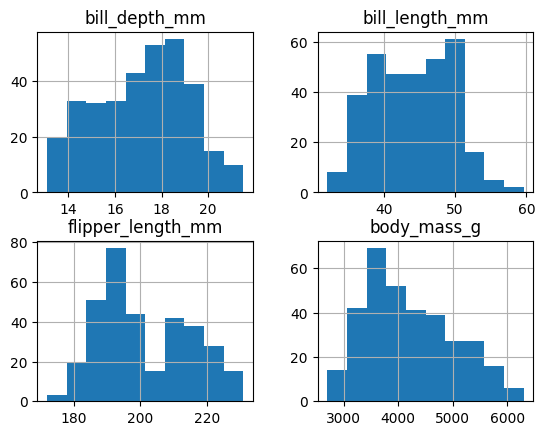

In [10]:
penguins[['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']].hist()

Les quatres valeurs quantitatives ne semblent pas présenter de valeurs aberrantes.

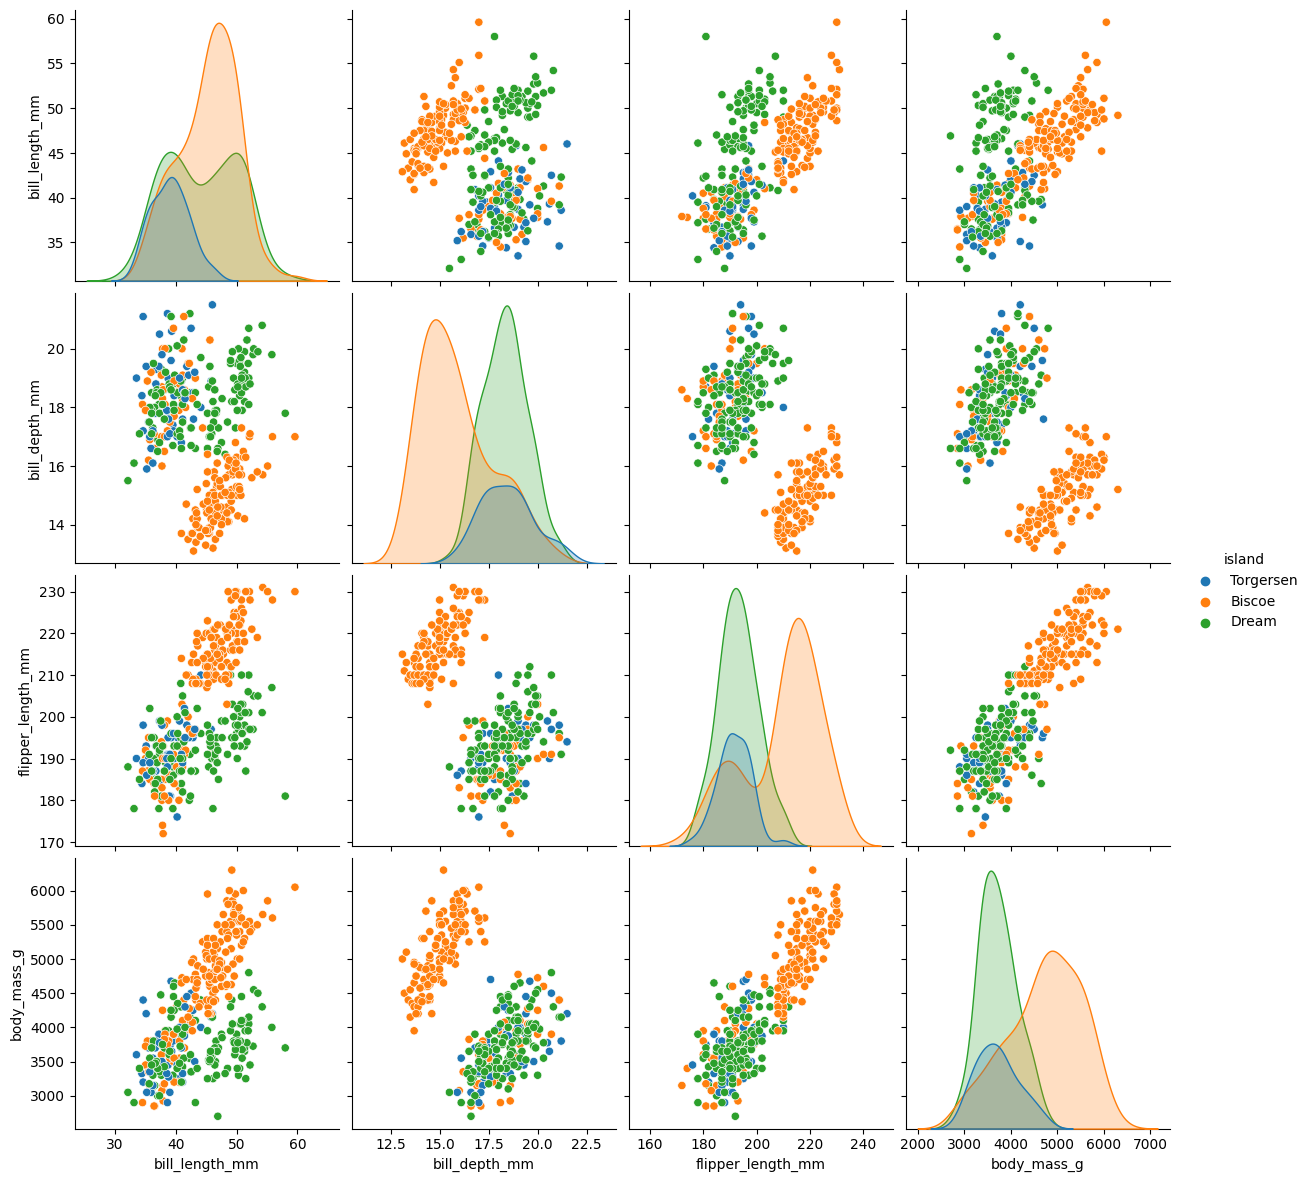

In [11]:
sns.pairplot(data=penguins, hue='island', height=3)

Il apparait que la population qui occupe l'île de Biscoe semble possédait des caractéristiques physiques qui les différencies des autres.

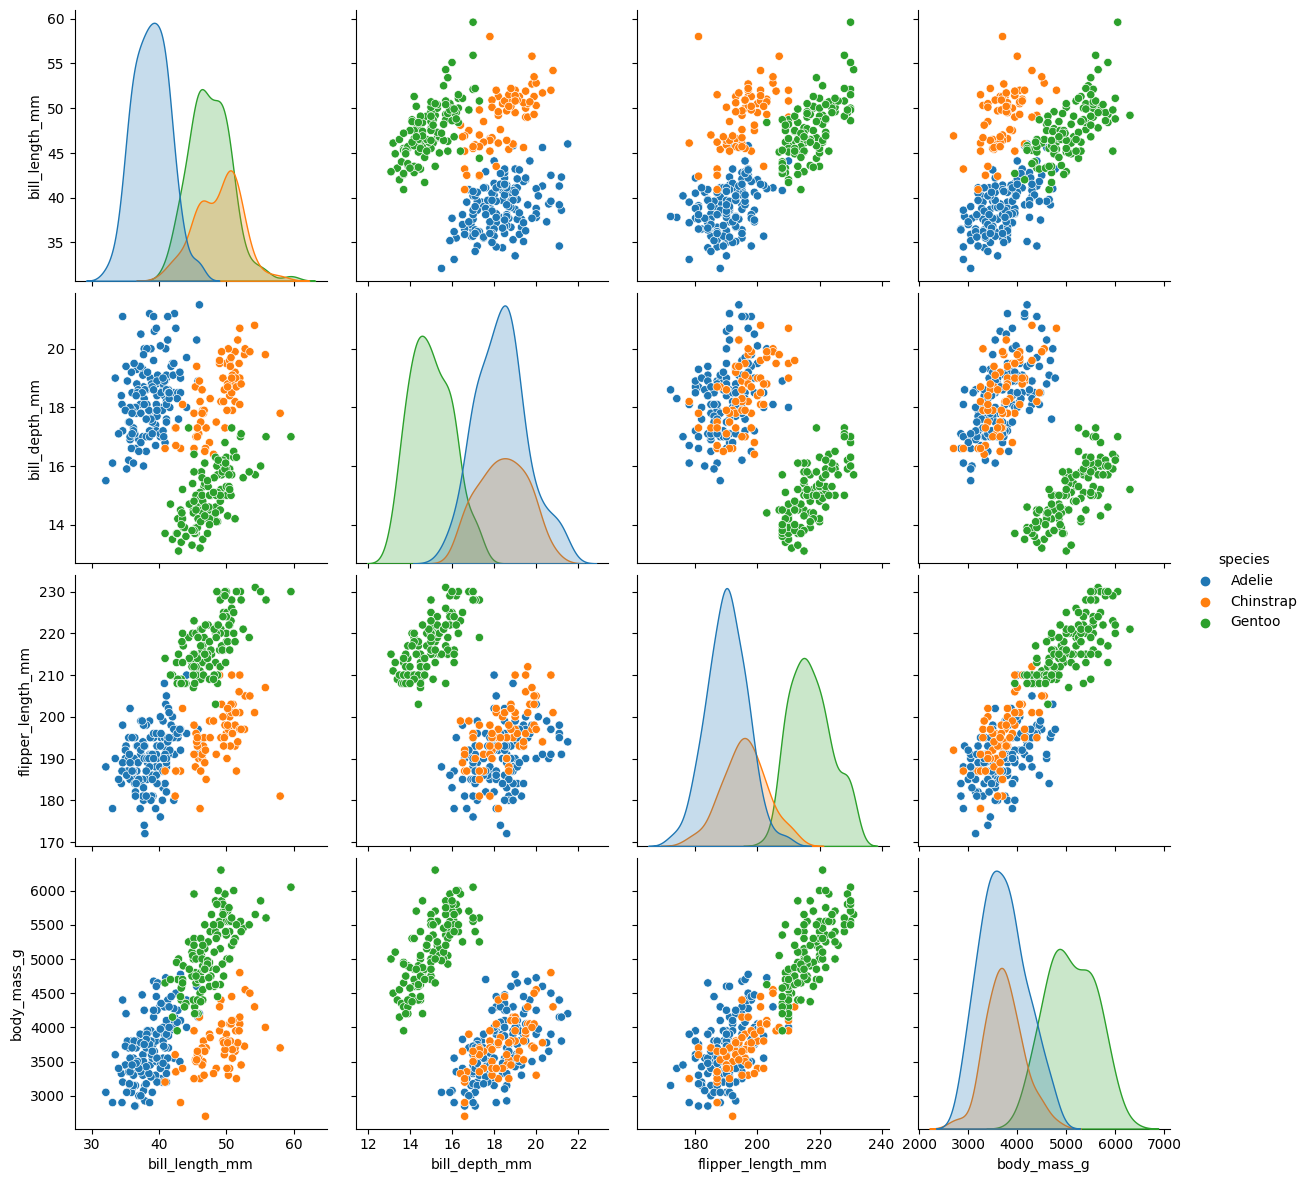

In [12]:
sns.pairplot(data=penguins, hue='species', height=3)

Il apparait que l'espèce Gentoo possède des caractéristiques qui la différencie des deux autres espèces étudiées. Et que certaines associations de caractères permettent de différencier les trois espèces.

## étude des quatre valeurs quantitatives en fonction du sexe

Text(0.5, 1.0, 'Poids en fonction du sexe')

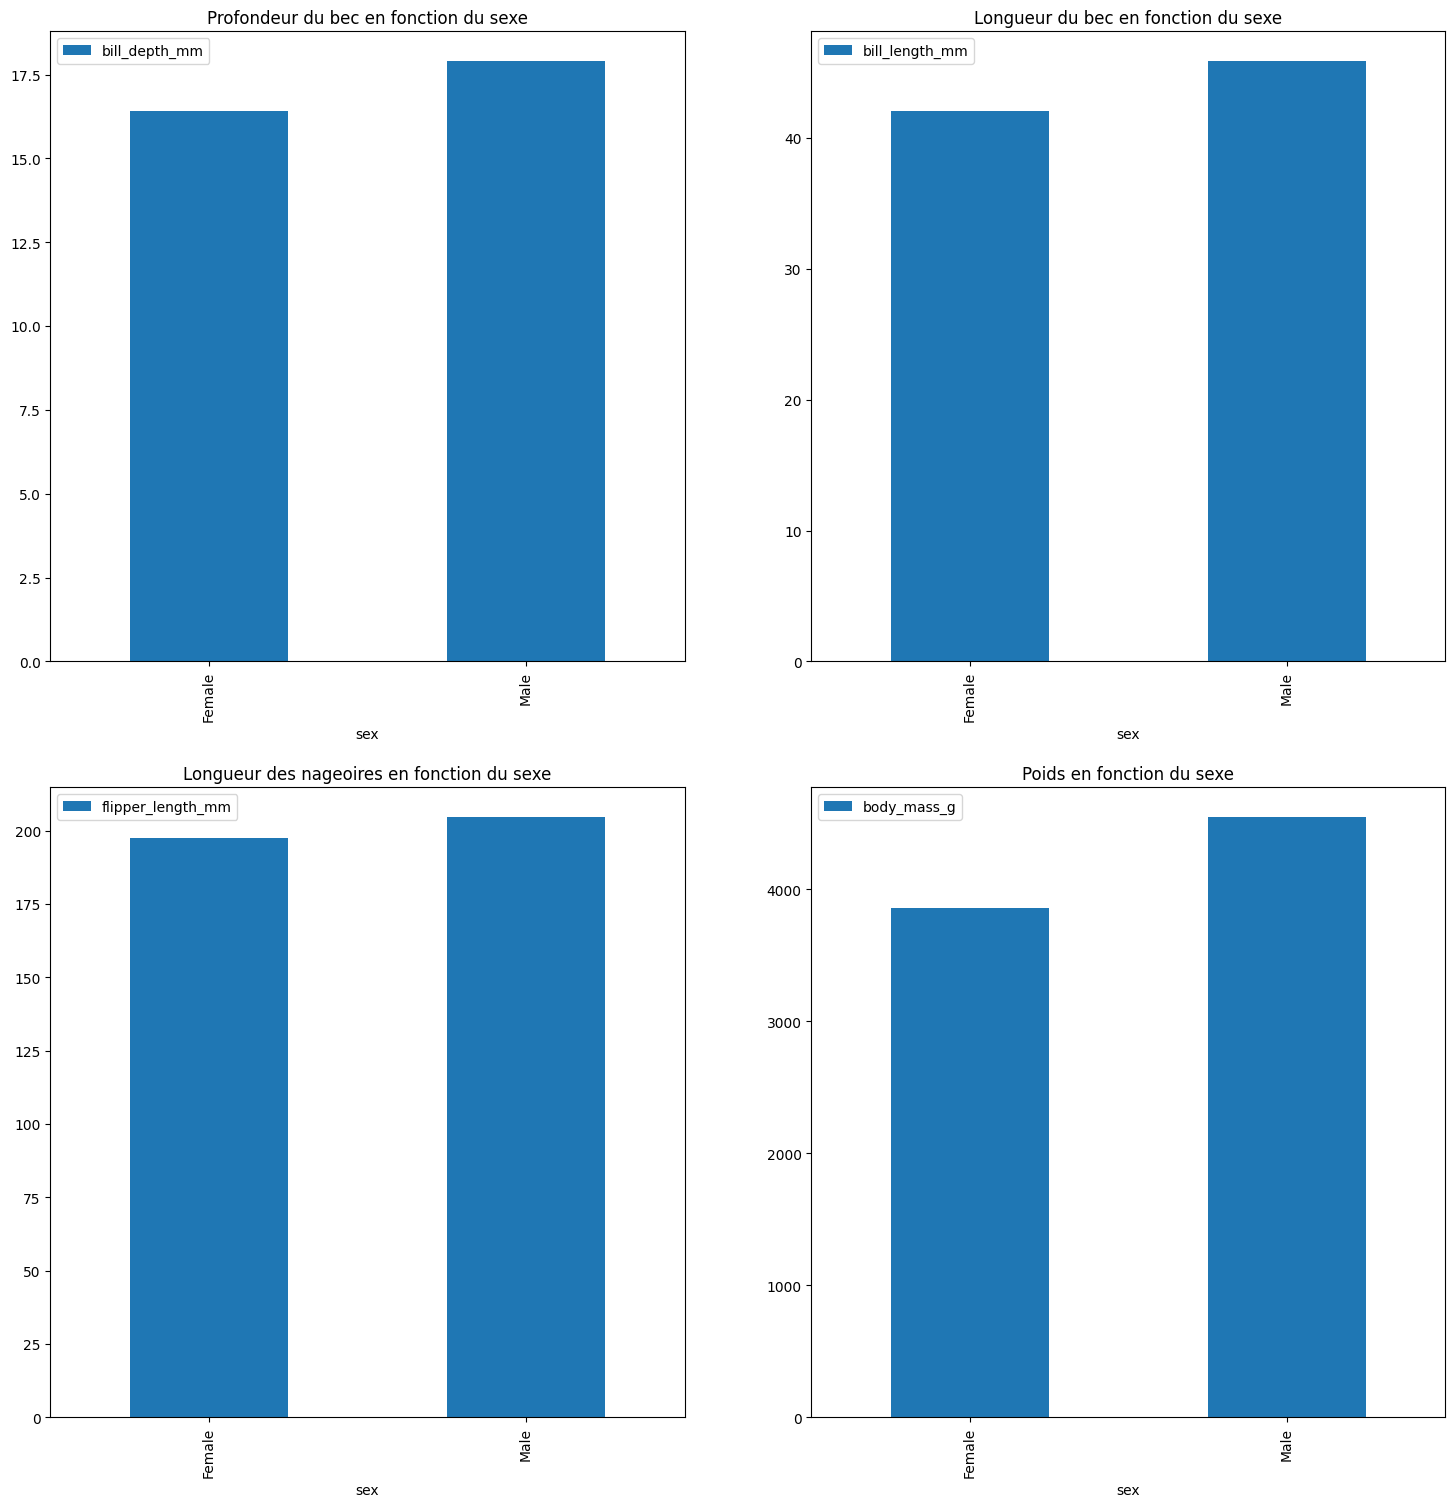

In [13]:
f, ax = plt.subplots(2, 2, figsize=(18, 18))
penguins[['sex', 'bill_depth_mm']].groupby(['sex']).mean().plot.bar(ax=ax[0,0])
ax[0 , 0].set_title('Profondeur du bec en fonction du sexe')
penguins[['sex', 'bill_length_mm']].groupby(['sex']).mean().plot.bar(ax=ax[0,1])
ax[0, 1].set_title('Longueur du bec en fonction du sexe')
penguins[['sex', 'flipper_length_mm']].groupby(['sex']).mean().plot.bar(ax=ax[1,0])
ax[1, 0].set_title('Longueur des nageoires en fonction du sexe')
penguins[['sex', 'body_mass_g']].groupby(['sex']).mean().plot.bar(ax=ax[1,1])
ax[1, 1].set_title('Poids en fonction du sexe')

Il apparait qu'il y a un faible dimorphisme sexuelle sur les quatre caractéristiques étudiés.

## étude des quatre valeurs quantitatives en fonction de l'espèce

Text(0.5, 1.0, "Poids en fonction de l'espèce")

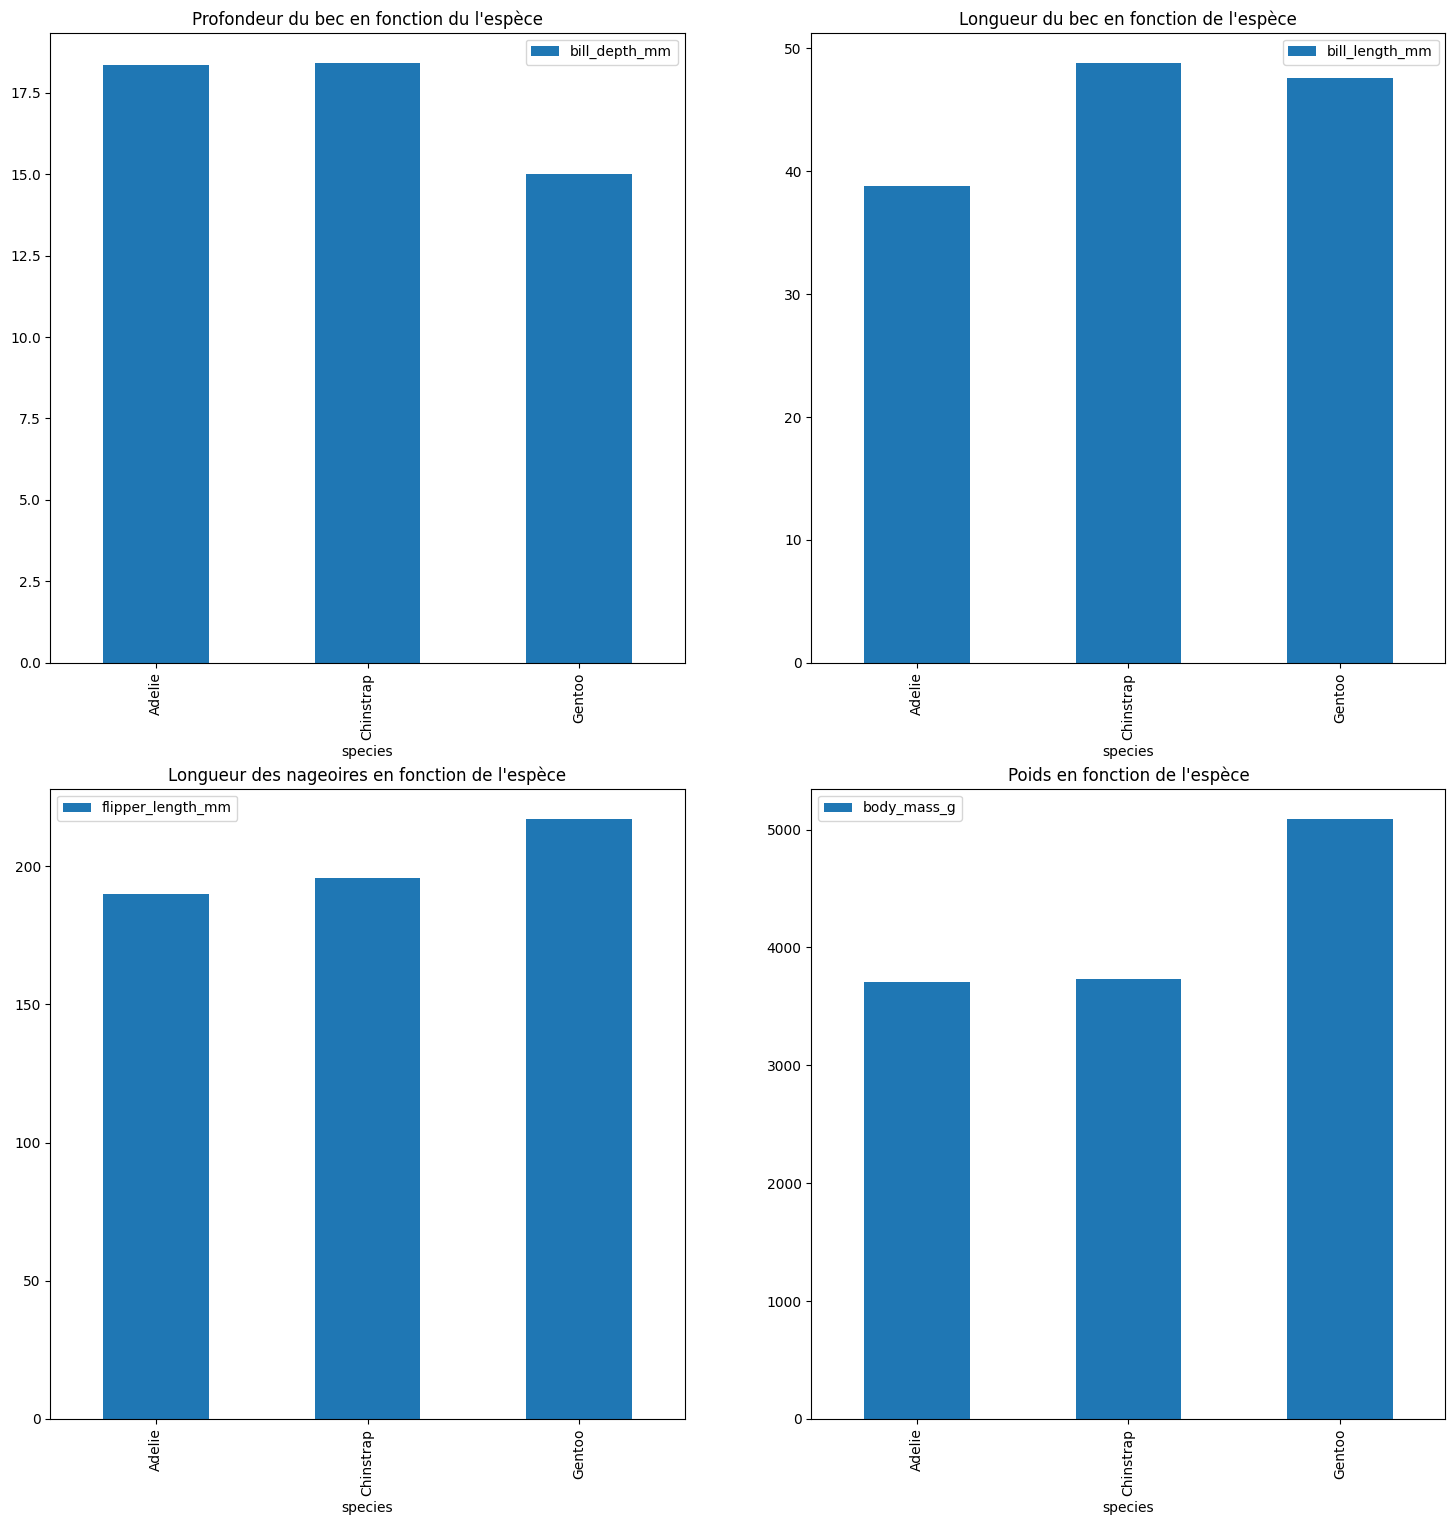

In [14]:
f, ax = plt.subplots(2, 2, figsize=(18, 18))
penguins[['species', 'bill_depth_mm']].groupby(['species']).mean().plot.bar(ax=ax[0, 0])
ax[0 , 0].set_title('Profondeur du bec en fonction du l\'espèce')
penguins[['species', 'bill_length_mm']].groupby(['species']).mean().plot.bar(ax = ax [0 ,1])
ax[0, 1].set_title('Longueur du bec en fonction de l\'espèce')
penguins[['species', 'flipper_length_mm']].groupby('species').mean().plot.bar(ax=ax[1, 0])
ax[1, 0].set_title('Longueur des nageoires en fonction de l\'espèce')
penguins[['species', 'body_mass_g']].groupby(['species']).mean().plot.bar(ax = ax[1, 1])
ax[1, 1].set_title('Poids en fonction de l\'espèce')

Il apparait qu'un caractère étudié se différencie au moins chez une espèce.

## étude des quatre valeurs quantitatives en fonction de l'origine

Text(0.5, 1.0, "Poids en fonction de l'île")

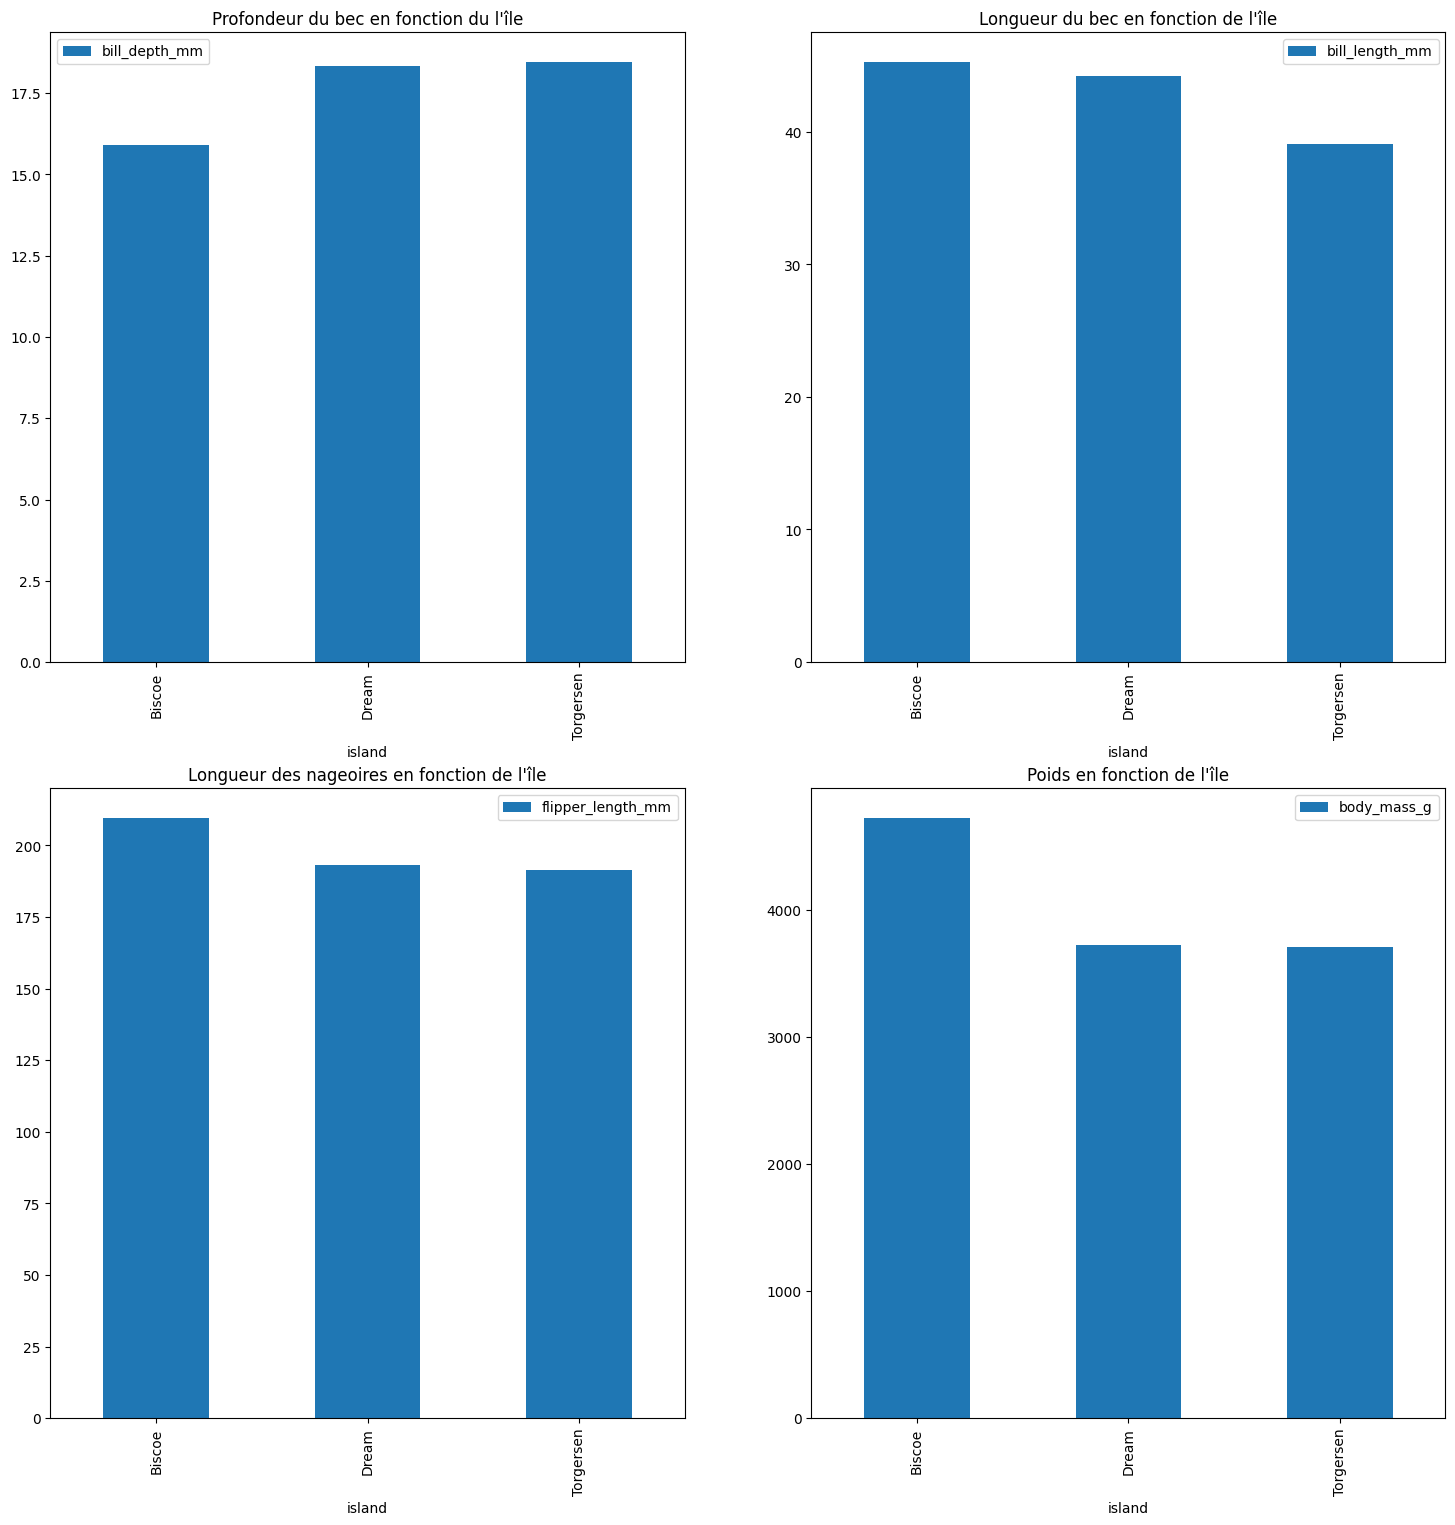

In [15]:
f, ax= plt.subplots(2, 2, figsize=(18, 18))
penguins[['island',  'bill_depth_mm']].groupby(['island']).mean().plot.bar(ax=ax[0, 0])
ax[0, 0].set_title('Profondeur du bec en fonction du l\'île')
penguins[['island', 'bill_length_mm']].groupby(['island']).mean().plot.bar(ax=ax[0, 1])
ax[0, 1].set_title('Longueur du bec en fonction de l\'île')
penguins[['island', 'flipper_length_mm']].groupby(['island']).mean().plot.bar(ax=ax[1, 0])
ax[1, 0].set_title('Longueur des nageoires en fonction de l\'île')
penguins[['island', 'body_mass_g']].groupby(['island']).mean().plot.bar(ax= ax[1, 1])
ax[1, 1].set_title('Poids en fonction de l\'île')

Le poids et la profondeur du bec apparaissent comme les caractères les plus différenciables en fonction de l'origine du manchot.

In [16]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## Répartition de la profondeur du bec au sein de chaque espèce

Text(0.5, 1.0, "répartition de la profondeur du bec pour l'espèce Gentoo")

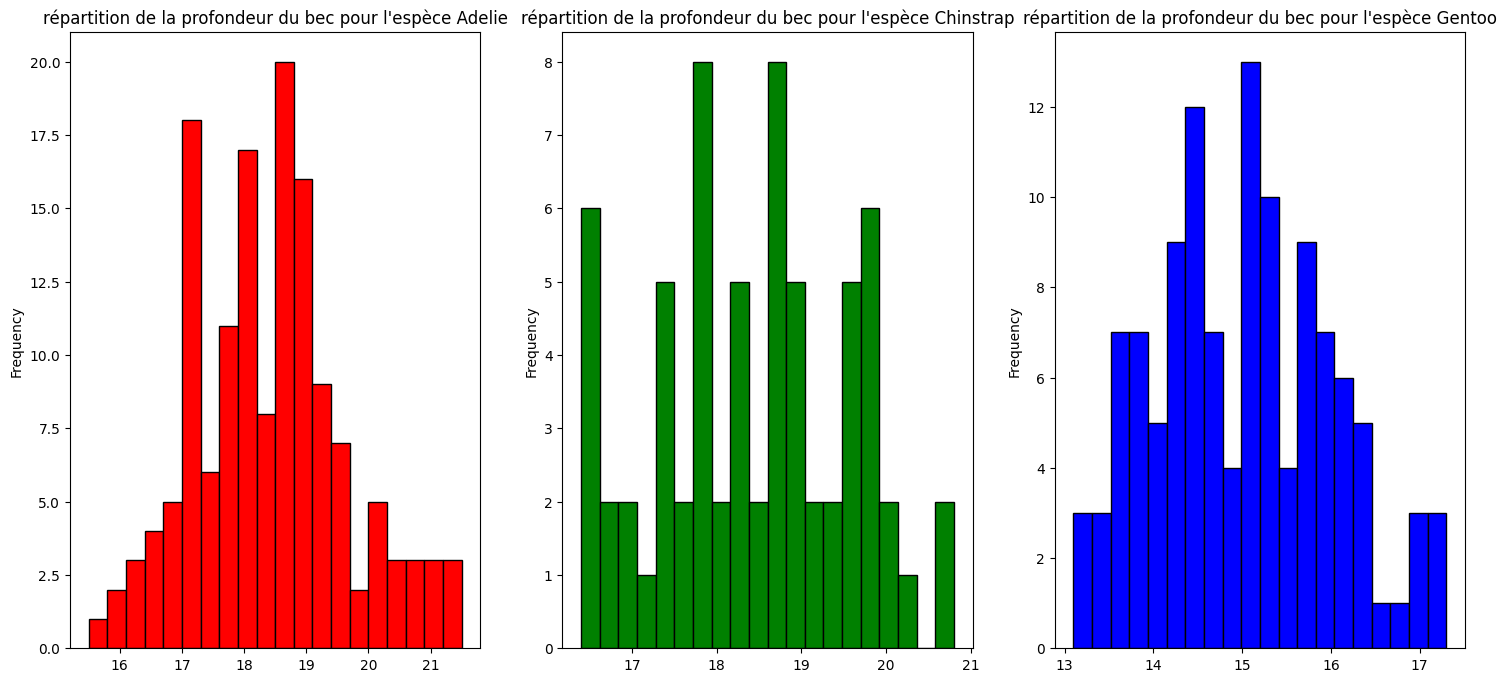

In [17]:
f, ax = plt.subplots(1, 3, figsize=(18, 8))
penguins[penguins['species'] == 'Adelie'].bill_depth_mm.plot.hist(ax=ax[0], bins=20, color='red', edgecolor='black')
ax[0].set_title('répartition de la profondeur du bec pour l\'espèce Adelie')
penguins[penguins['species'] == 'Chinstrap'].bill_depth_mm.plot.hist(ax=ax[1], bins=20, color='green', edgecolor="black")
ax[1].set_title('répartition de la profondeur du bec pour l\'espèce Chinstrap')
penguins[penguins['species'] == 'Gentoo'].bill_depth_mm.plot.hist(ax=ax[2], bins=20, color='blue', edgecolor='black')
ax[2].set_title('répartition de la profondeur du bec pour l\'espèce Gentoo')

Mis à part pour l'espèce Adelie, les valeurs pour la profondeur du bec se répartissent sur toutes les valeurs et apparait comme un caractère plus individuel.

## Répartition de la longueur du bec au sein de chaque espèce

Text(0.5, 1.0, "répartition de la longueur du bec pour l'espèce Gentoo")

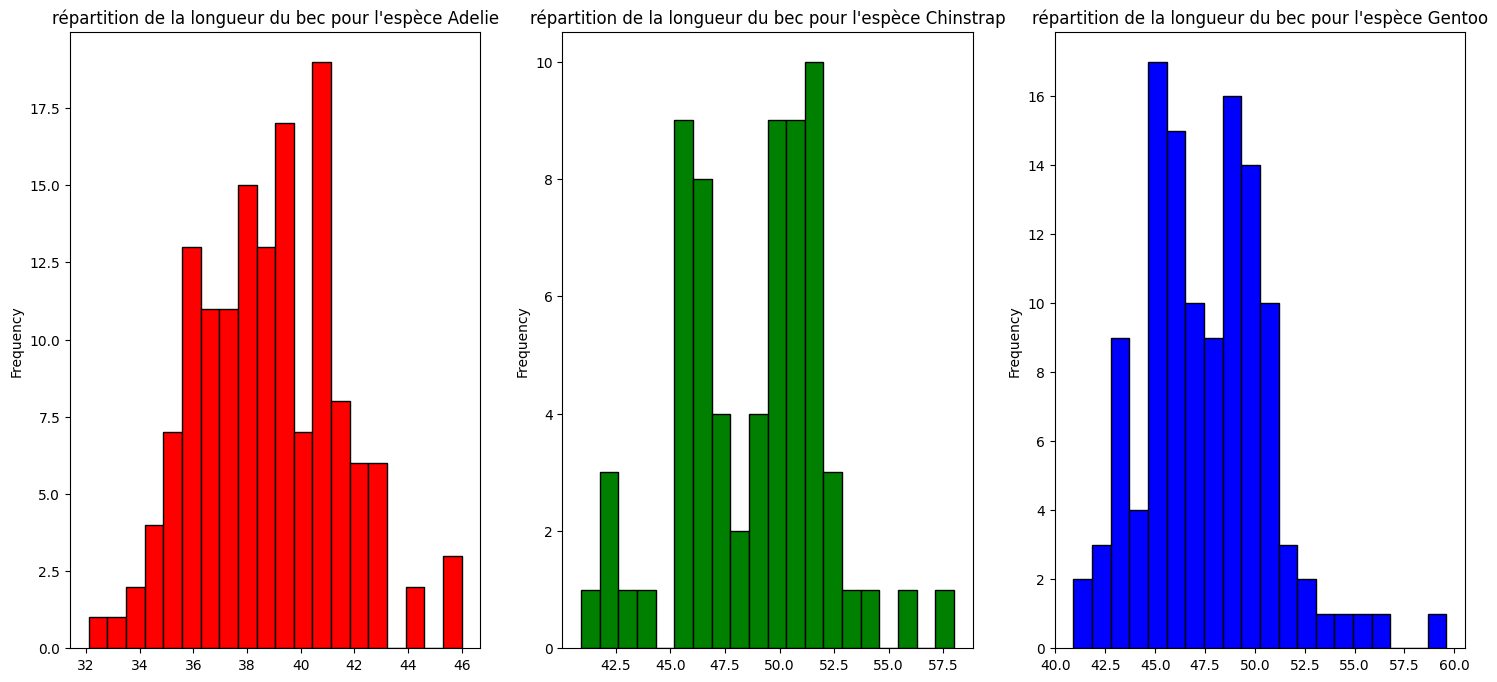

In [18]:
f, ax = plt.subplots(1, 3, figsize=(18, 8))
penguins[penguins['species'] == 'Adelie'].bill_length_mm.plot.hist(ax=ax[0], bins=20, color='red', edgecolor='black')
ax[0].set_title('répartition de la longueur du bec pour l\'espèce Adelie')
penguins[penguins['species'] == 'Chinstrap'].bill_length_mm.plot.hist(ax=ax[1], bins=20, color='green', edgecolor='black')
ax[1].set_title('répartition de la longueur du bec pour l\'espèce Chinstrap')
penguins[penguins['species'] == 'Gentoo'].bill_length_mm.plot.hist(ax=ax[2], bins=20, color='blue', edgecolor='black')
ax[2].set_title('répartition de la longueur du bec pour l\'espèce Gentoo')

La longueur du bec semble être un caractère plus fortement marqué pour l'ensemble de l'espèce.

## Répartition de la longueur des nageoires au sein de chaque espèce

Text(0.5, 1.0, "répartition de la longueur de la nageoire pour l'espèce Gentoo")

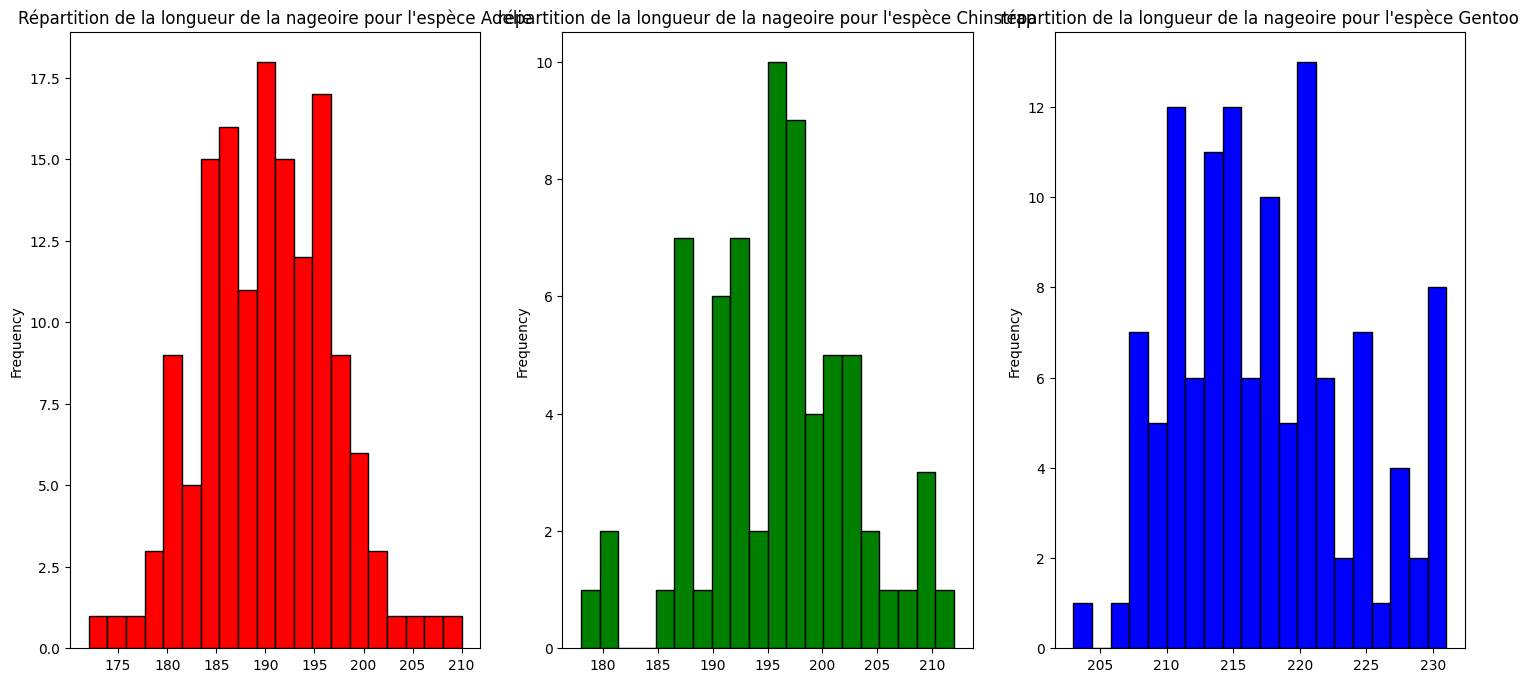

In [19]:
f, ax = plt.subplots(1, 3, figsize=(18, 8))
penguins[penguins['species'] == 'Adelie'].flipper_length_mm.plot.hist(ax=ax[0], bins=20, color='red', edgecolor='black')
ax[0].set_title('Répartition de la longueur de la nageoire pour l\'espèce Adelie')
penguins[penguins['species'] == 'Chinstrap'].flipper_length_mm.plot.hist(ax=ax[1], bins=20, color='green', edgecolor='black')
ax[1].set_title('répartition de la longueur de la nageoire pour l\'espèce Chinstrap')
penguins[penguins['species'] == 'Gentoo'].flipper_length_mm.plot.hist(ax=ax[2], bins=20, color='blue', edgecolor='black')
ax[2].set_title('répartition de la longueur de la nageoire pour l\'espèce Gentoo')

Comme pour la profondeur du bec, cela semble plus individuel chez Chinstrap et Gentroo, contrairement à Adelie.

## Répartition du poids au sein de chaque espèce

Text(0.5, 1.0, "répartition du poids dans l'espèce Gentoo")

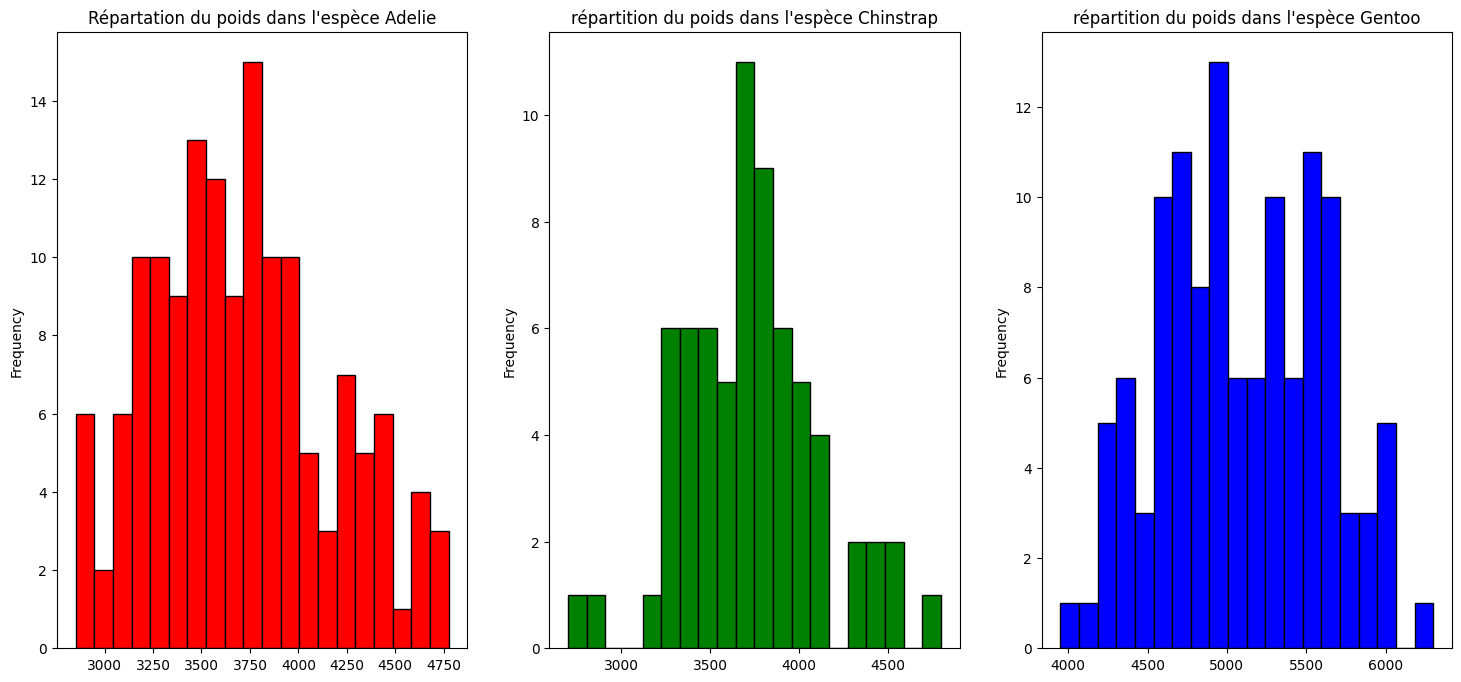

In [20]:
f, ax = plt.subplots(1, 3, figsize=(18, 8))
penguins[penguins['species'] == 'Adelie'].body_mass_g.plot.hist(ax=ax[0], bins=20, color='red', edgecolor='black')
ax[0].set_title('Répartation du poids dans l\'espèce Adelie')
penguins[penguins['species'] == 'Chinstrap'].body_mass_g.plot.hist(ax=ax[1], bins=20, color='green', edgecolor='black')
ax[1].set_title('répartition du poids dans l\'espèce Chinstrap')
penguins[penguins['species'] == 'Gentoo'].body_mass_g.plot.hist(ax=ax[2], bins=20, color='blue', edgecolor='black')
ax[2].set_title('répartition du poids dans l\'espèce Gentoo')

Le poids apparait comme un caractère plus spécifique à l'espèce, même si Gentoo apparait plus disparate dans sa répartition.

 ## Analyse des quatre valeurs quantitatives en fonction du sexe pour chaque population

<AxesSubplot: xlabel='species', ylabel='body_mass_g'>

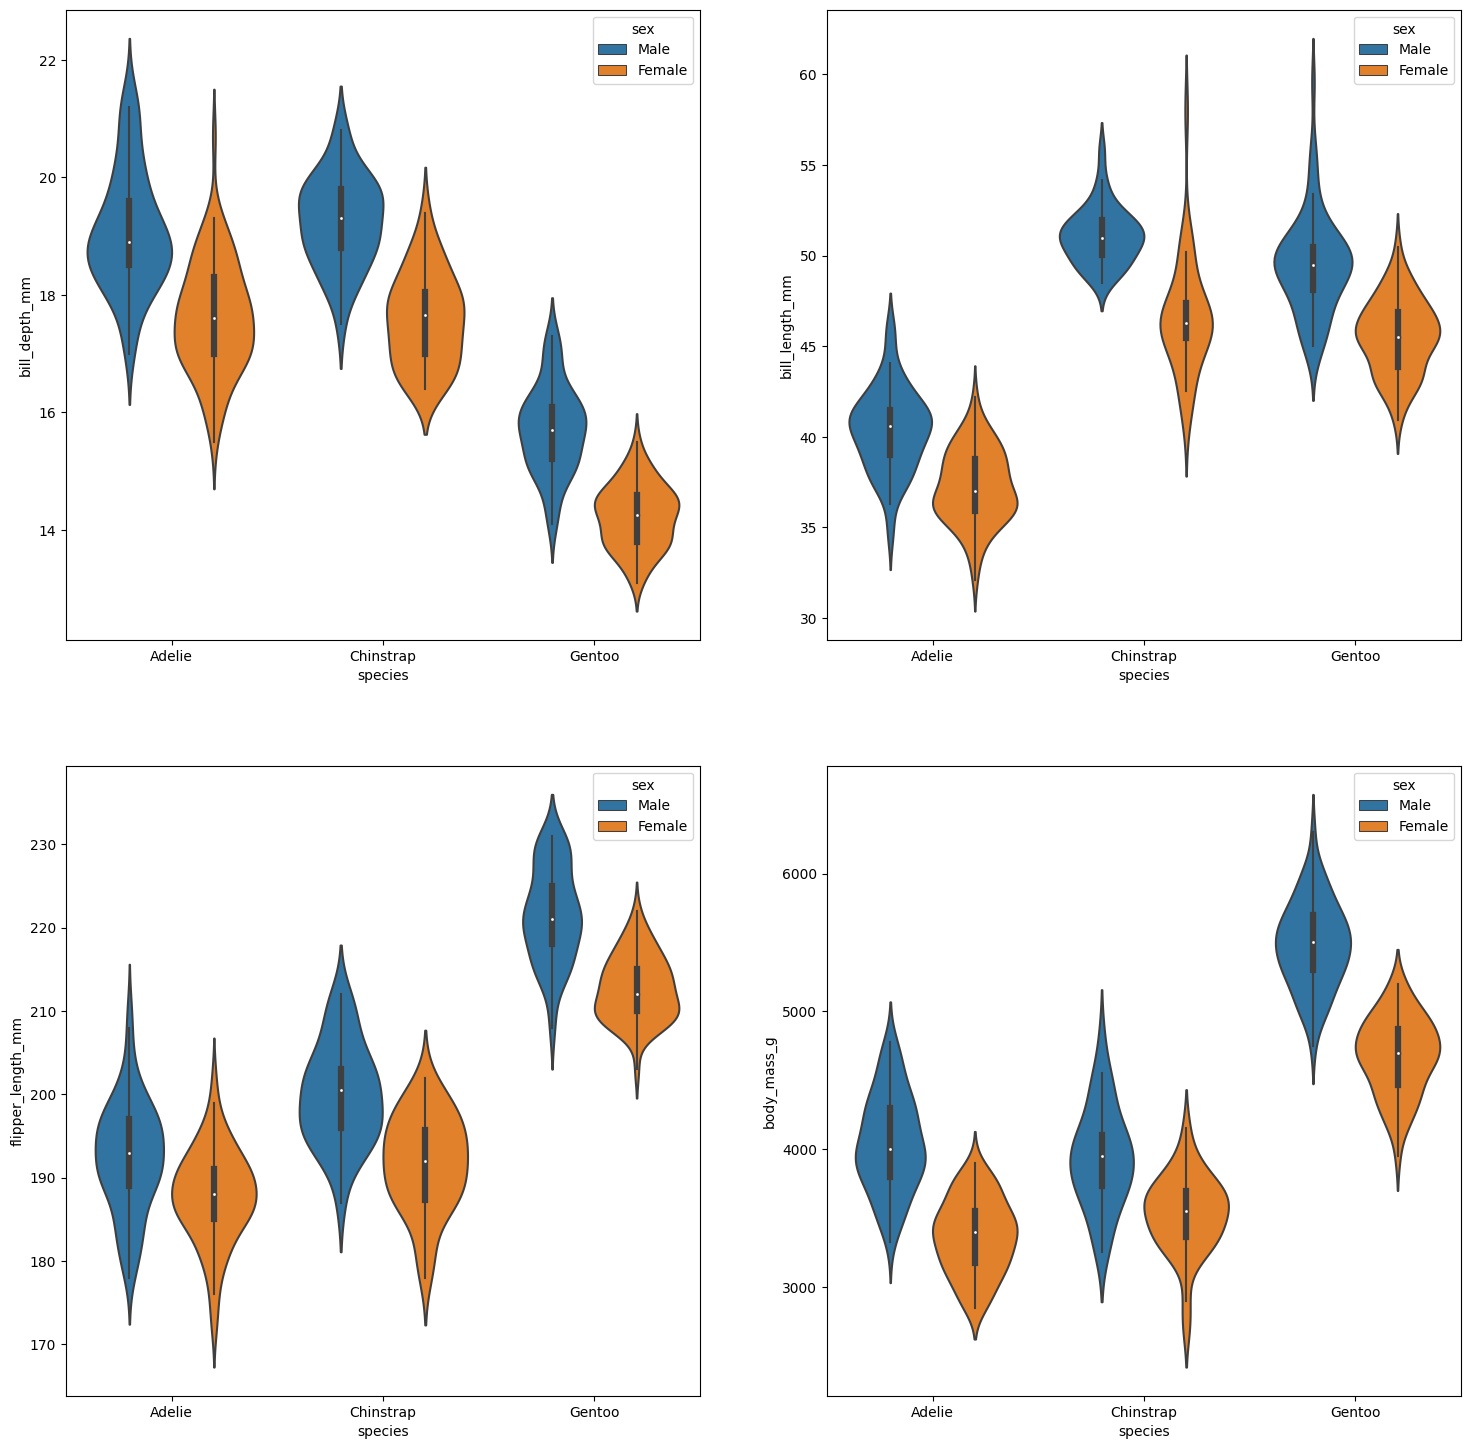

In [21]:
f, ax = plt.subplots(2, 2, figsize=(18, 18))
sns.violinplot(x='species', y ='bill_depth_mm', hue='sex', data=penguins, ax=ax[0, 0])
sns.violinplot(x='species',y='bill_length_mm', hue='sex', data=penguins, ax=ax[0, 1])
sns.violinplot(x='species', y='flipper_length_mm', hue='sex', data=penguins, ax=ax[1, 0])
sns.violinplot(x='species', y='body_mass_g', hue='sex', data=penguins, ax=ax[1, 1])

Même si les mâles possèdent des caractéristiques plus dominantes que la femelle, les dimorphismes sexuels permet pour certain caractère une différenciation entre les espèces. Même si Chinstrap apparait toujours proche pour l'un de ses caractères d'une autre espèce.

In [22]:
penguins.groupby(['island', 'species'])['species'].count()

island     species  
Biscoe     Adelie        44
           Gentoo       119
Dream      Adelie        55
           Chinstrap     68
Torgersen  Adelie        47
Name: species, dtype: int64

In [23]:
pd.crosstab(penguins.island, penguins.species, margins=True).style.background_gradient(cmap='summer_r')

species,Adelie,Chinstrap,Gentoo,All
island,,,,
Biscoe,44,0,119,163
Dream,55,68,0,123
Torgersen,47,0,0,47
All,146,68,119,333


Il apparait que l'espèce Adelie apparaissent sur toutes les îles et elle se trouve seule sur l'île Torgersen, alors que les deux autres sont endémiques chacune d'une île.

In [24]:
pd.crosstab(penguins.sex, penguins.species, margins=True).style.background_gradient(cmap='summer_r')

species,Adelie,Chinstrap,Gentoo,All
sex,,,,
Female,73,34,58,165
Male,73,34,61,168
All,146,68,119,333


In [25]:
pd.crosstab(penguins.sex, penguins.island, margins=True).style.background_gradient(cmap='summer_r')

island,Biscoe,Dream,Torgersen,All
sex,,,,
Female,80,61,24,165
Male,83,62,23,168
All,163,123,47,333


La répartition des sexes que ce soit entre les espèces ou les îles sont équitables. Les mâles et les femelles présentant un dimorphisme sexuel, une proportion différente aurait eut une influence sur les données.

In [121]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna(subset=['sex'])

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [123]:
y = penguins['species']
X = penguins.drop(['species', 'sex'], axis=1)

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             333 non-null    object 
 1   bill_length_mm     333 non-null    float64
 2   bill_depth_mm      333 non-null    float64
 3   flipper_length_mm  333 non-null    float64
 4   body_mass_g        333 non-null    float64
dtypes: float64(4), object(1)
memory usage: 15.6+ KB


In [93]:
#penguins.replace(['Adelie', 'Chinstrap', 'Gentoo'], [1, 2, 3], inplace=True)
#penguins.island.replace(['Torgersen', 'Biscoe', 'Dream'], [1,2,3], inplace=True)

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_6176\99140634.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(penguins.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


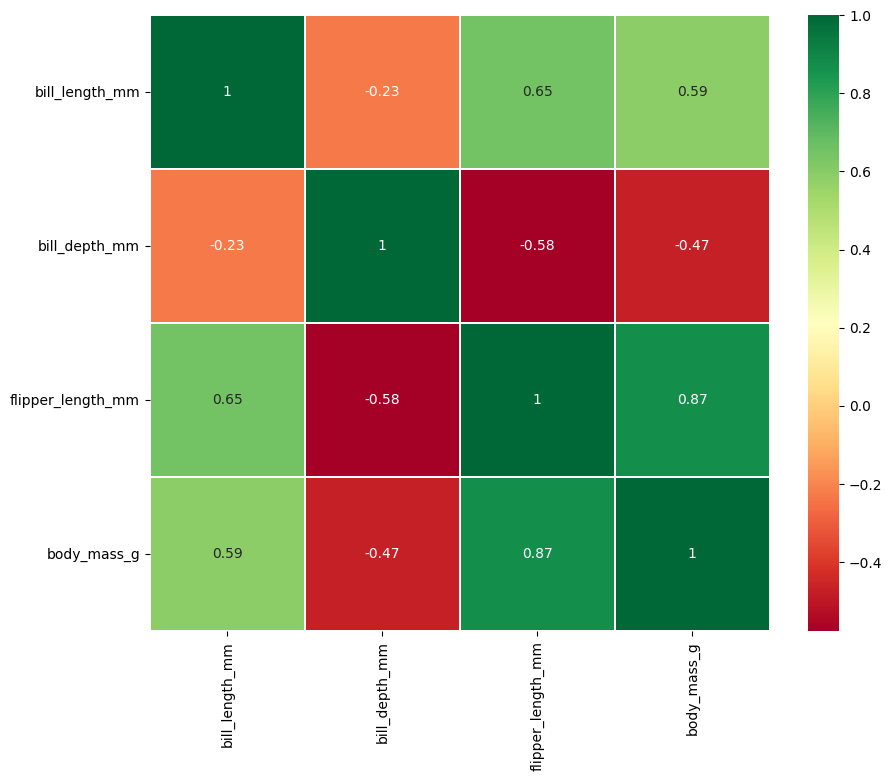

In [124]:
sns.heatmap(penguins.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (266, 5)
Test set: (67, 5)


In [131]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

Encodage des valeurs qualitatives

In [132]:

encoder_l = LabelEncoder()
encoder_f = LabelEncoder()
X_train["island"] = encoder_f.fit_transform(X_train["island"])
X_test["island"] = encoder_f.transform(X_test["island"])
y_train = encoder_l.fit_transform(y_train)
y_test = encoder_l.transform(y_test)

Normalisation des valeurs quantitatives

In [133]:
scaler = MinMaxScaler()
val_quali = ['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm']
X_train[val_quali]= scaler.fit_transform(X_train[val_quali])
X_test[val_quali]= scaler.transform(X_test[val_quali])

In [134]:
model = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [135]:
cv = StratifiedKFold()
cross_val_score(model, X_train, y_train, cv= cv).mean()

0.9849056603773585

In [136]:
from sklearn.model_selection import validation_curve

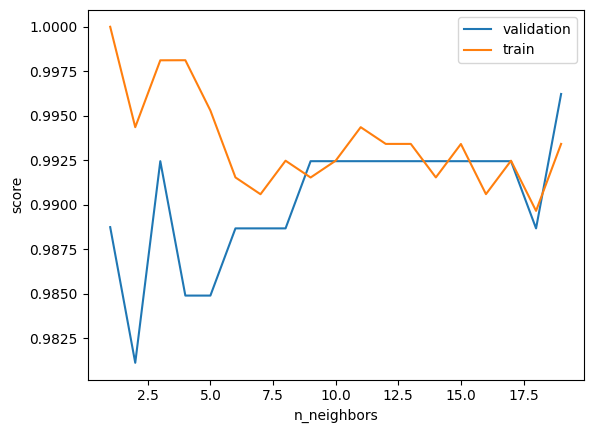

In [137]:
k = np.arange(1, 20)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors',
                                            param_range= k, cv=cv)
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label="train")

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
param_grid= {'n_neighbors': np.arange(1, 20),
'metric':['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = cv)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [140]:
grid.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [141]:
grid.best_params_
model = grid.best_estimator_
model.score(X_test, y_test)

1.0

In [142]:
from sklearn.metrics import confusion_matrix

<AxesSubplot: >

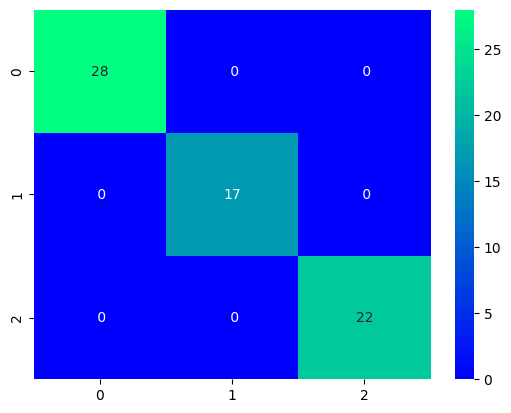

In [143]:
#confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), cmap='winter', annot=True, fmt='2.0f')

Avant la normalisation, la matrix de confusion montre que notre modèle n'arrive pas à différencier l'espèce Chintrap de l'espèce Adelie, puisque 41% de sa population n'est pas reconnu comme appartenant à Chintrap. Après avoir retiré le caractère 'taille de la nageoire', le taux d'individu mal placé diminue à 29%. Le 'sexe' ne change rien pour la reconnaissance d'un individu dans une espèce. Avec l'origine en moins, le taux d'individu mal placé de l'espèce Chinstrap monte à 35%. <br>
Après normalisation avec MinMaxScaler, le modèle arrive à identifier chaque espèce avec un taux de 100%, y compris avec le caractère 'taille de la nageoire' !!!! (est-ce normal ????)

In [145]:
def penguins_response(model, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g):
    x = np.array([str(island), float(bill_length_mm), float(bill_depth_mm), float(flipper_length_mm), float(body_mass_g)]).reshape(1, 5)
    x = pd.DataFrame(x, columns=['island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g'])
    #x =[[str(island), float(bill_length_mm), float(bill_depth_mm), float(flipper_length_mm), float(body_mass_g)]]

    x['island']= encoder_f.transform(x['island'])
    x[val_quali] = scaler.transform(x[val_quali])
    
    print(encoder_l.inverse_transform(model.predict(x))[0])
    """specie_response= ''
    if model.predict(x)[0] == 0:
        specie_response = 'Adelie'
    elif model.predict(x)[0] == 1:
        specie_response = 'Chinstrap'
    elif model.predict(x)[0] == 2:
        specie_response = 'Gentoo'
    print(specie_response)"""
    #print(model.predict(x))
    print(model.predict_proba(x))

In [146]:
penguins.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [147]:
penguins_response(model, 'Dream', 55, 60, 64,  4000)

Adelie
[[0.73684211 0.26315789 0.        ]]


In [148]:
from sklearn.model_selection import learning_curve

[ 21  42  63  84 106 127 148 169 190 212]


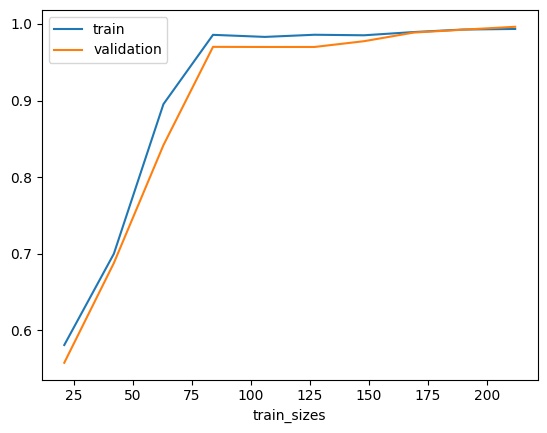

In [149]:
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                            train_sizes= np.linspace(0.1, 1.0, 10), cv=cv)
print(N)
plt.plot(N, train_score.mean(axis = 1),label='train')
plt.plot(N, val_score.mean(axis= 1), label='validation')
plt.xlabel('train_sizes')
plt.legend()